In [71]:
import sympy as sp
from sympy import solve,Matrix,diff,integrate
a0,a1,x,L,EA,p = sp.symbols("a_0 a_1 x L EA p")
u1,u2,u3 = sp.symbols("u_1 u_2 u_3")
u = a0+a1*x
display("linear Form of Displacement:")
display("u =", u)
eq1 = u.subs({x:0})
eq2 = u.subs({x:L})
s = solve((eq1-u1,eq2-u2),a0,a1)
display("Solve")
display("a_0 =",s[a0],"a_1 =",s[a1])
u = u.subs(s).expand()
display("Rearranging")
display("u =",u)
N1 = u.coeff(u1)
N2 = u.coeff(u2)
display("Shape Functions")
B = Matrix([[diff(N1,x),diff(N2,x)]])
display("B =",B.T)
K = EA*Matrix([[integrate(B[i]*B[j], (x,0,L)) for i in range(2)] for j in range(2)])
display("K^e =",K)
Nn = Matrix([[N1,N2]]).T
display("N =",Nn)
# fe = Matrix([q*integrate(Nn[i],(x,0,L))for i in range(2)]) # sum with punctual if q
fe= Matrix([0, p])
display("Nodal Force Vector")
display("f^e =",fe)


'linear Form of Displacement:'

'u ='

a_0 + a_1*x

'Solve'

'a_0 ='

u_1

'a_1 ='

(-u_1 + u_2)/L

'Rearranging'

'u ='

u_1 - u_1*x/L + u_2*x/L

'Shape Functions'

'B ='

Matrix([
[-1/L],
[ 1/L]])

'K^e ='

Matrix([
[ EA/L, -EA/L],
[-EA/L,  EA/L]])

'N ='

Matrix([
[1 - x/L],
[    x/L]])

'Nodal Force Vector'

'f^e ='

Matrix([
[0],
[p]])

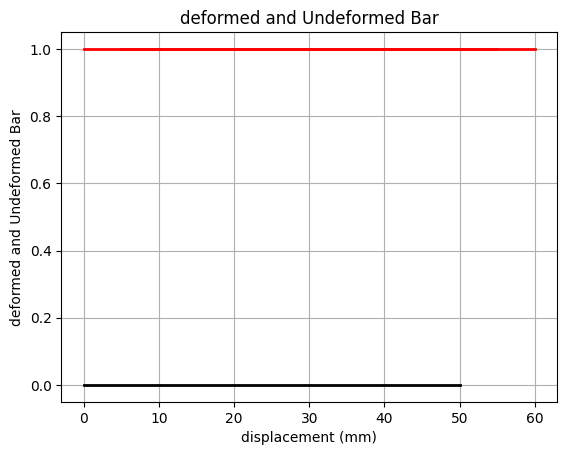

Deplacement max [10.]


In [72]:

import numpy as np
import matplotlib.pyplot as plt

# Material properties
E = 100  # Young's modulus MPa
A = 10  # Cross-sectional area mm2

# Mesh parameters
num_elements = 10
num_nodes = num_elements + 1
L = 50  # Length of the bar mm
dx = L / num_elements

# Global stiffness matrix and load vector
K_global = np.zeros((num_nodes, num_nodes))
F_global = np.zeros((num_nodes, 1))

# Element stiffness matrix
Ke = E * A / dx * np.array([[1, -1], [-1, 1]])

# Assembling global stiffness matrix
for i in range(num_elements):
    # Indices of nodes for the current element
    node1 = i
    node2 = i + 1

    # Assemble element stiffness matrix
    K_global[node1:node2 + 1, node1:node2 + 1] += Ke

# Applying boundary conditions (Dirichlet BC: u(0) = 0 (removed in Kred), F(L) = +200 (last))
Kred=K_global[1:num_nodes,1:num_nodes]
F_global[-1] = 200 #N
Fred=F_global[1:num_nodes]

# Solve for displacement
Ured = np.linalg.solve(Kred, Fred)
U = np.zeros((num_nodes,1))  # Initialize U with zeros, size 1xnum_nodes
U[1:num_nodes] = Ured

# Plotting
x = np.linspace(0, L, num_nodes)

# Undeformed bar
plt.plot(x, np.zeros_like(x), 'k-', label='Undeformed Bar', linewidth=2)

# Deformed bar
plt.plot(x+U, 1+np.zeros_like(x), 'r-', label='Deformed Bar', linewidth=2)

plt.xlabel('displacement (mm)')
plt.ylabel('deformed and Undeformed Bar')
plt.title('deformed and Undeformed Bar')
plt.grid(True)
plt.show()

Umax=F_global[-1]*L/(E*A)
print('Deplacement max', Umax)

In [73]:
import sympy as sp
from sympy import solve,Matrix,diff,integrate
a0,a1,a2,x,L,EA,p = sp.symbols("a_0 a_1 a_2 x L EA p")
u1,u2,u3 = sp.symbols("u_1 u_2 u_3")
u = a0+a1*x+a2*x**2
display("Quadratic Form of Displacement:")
display("u =", u)
eq1 = u.subs({x:0})
eq2 = u.subs({x:L/2})
eq3 = u.subs({x:L})
s = solve((eq1-u1,eq2-u2,eq3-u3),a0,a1,a2)
display("Solve")
display("a_0 =",s[a0],"a_1 =",s[a1],"a_2 =",s[a2])
u = u.subs(s).expand()
display("Rearranging")
display("u =",u)
N1 = u.coeff(u1)
N2 = u.coeff(u2)
N3 = u.coeff(u3)
display("Shape Functions")
B = Matrix([[diff(N1,x),diff(N2,x),diff(N3,x)]])
display("B =",B.T)
K = EA*Matrix([[integrate(B[i]*B[j], (x,0,L)) for i in range(3)] for j in range(3)])
display("K^e =",K)
Nn = Matrix([[N1,N2,N3]]).T
display("N =",Nn)
fe = Matrix([p*integrate(Nn[i],(x,0,L))for i in range(3)])
display("Nodal Force Vector")
display("f^e =",fe)


'Quadratic Form of Displacement:'

'u ='

a_0 + a_1*x + a_2*x**2

'Solve'

'a_0 ='

u_1

'a_1 ='

(-3*u_1 + 4*u_2 - u_3)/L

'a_2 ='

(2*u_1 - 4*u_2 + 2*u_3)/L**2

'Rearranging'

'u ='

u_1 - 3*u_1*x/L + 4*u_2*x/L - u_3*x/L + 2*u_1*x**2/L**2 - 4*u_2*x**2/L**2 + 2*u_3*x**2/L**2

'Shape Functions'

'B ='

Matrix([
[-3/L + 4*x/L**2],
[ 4/L - 8*x/L**2],
[-1/L + 4*x/L**2]])

'K^e ='

Matrix([
[ 7*EA/(3*L), -8*EA/(3*L),    EA/(3*L)],
[-8*EA/(3*L), 16*EA/(3*L), -8*EA/(3*L)],
[   EA/(3*L), -8*EA/(3*L),  7*EA/(3*L)]])

'N ='

Matrix([
[1 - 3*x/L + 2*x**2/L**2],
[    4*x/L - 4*x**2/L**2],
[     -x/L + 2*x**2/L**2]])

'Nodal Force Vector'

'f^e ='

Matrix([
[  L*p/6],
[2*L*p/3],
[  L*p/6]])